In [1]:
import os
import warnings
import pandas

warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.style.use('seaborn-notebook')

from soma.generators.normal import MultivariateNormalGenerator
from soma.tests import som_test, knn_test, c2s_knn_test, c2s_nn_test
from soma.util.errors import stat_errors_vs_sample_size
from soma.util.plot import plot_errors, plot_time

In [2]:
plot_dir = os.path.expanduser('~/Plots/power_sample_size')
os.makedirs(plot_dir, exist_ok=True)

In [3]:
tests = {
    'knn': knn_test,
    'som': som_test,
    'c2st_knn': c2s_knn_test,
    'c2st_nn': c2s_nn_test,
}

In [4]:
samples = np.array([100, 250, 500, 1000, 2500, 5000])
repeat = 200

# Normal (location)

In [5]:
means = np.zeros(1000)
means2 = np.ones(1000)

n1 = MultivariateNormalGenerator(means, cov=np.diag(np.ones(1000)))
n2 = MultivariateNormalGenerator(means2, cov=np.diag(np.ones(1000)))

In [6]:
#normal_results = stat_errors_vs_sample_size(n2, n1, tests, samples, repeat=repeat)
#normal_results.to_csv('../../results/sample_size/normal_results_samples.csv')
normal_results = pandas.read_csv('../../results/sample_size/normal_results_samples.csv', index_col=[0, 1])

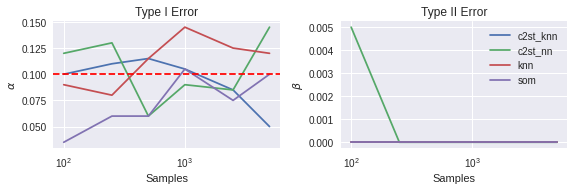

In [7]:
normal_loc_fig = plot_errors(normal_results, logscale=True)
normal_loc_fig.savefig(os.path.join(plot_dir, 'normal_111_power_samples.eps'))

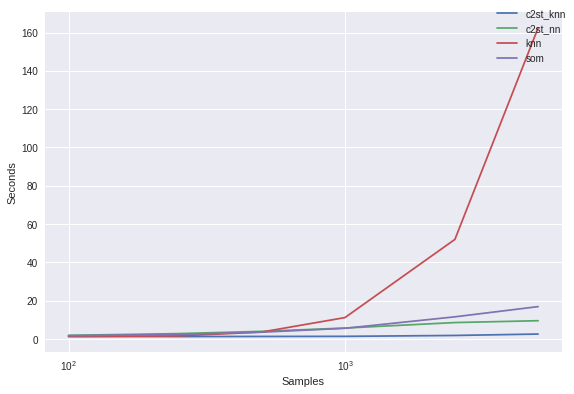

In [8]:
normal_loc_time = plot_time(normal_results, logscale=True)
normal_loc_time.savefig(os.path.join(plot_dir, 'normal_loc_time_samples.eps'))

# Normal (location, fair)

In [9]:
means3 = np.zeros(1000)
means2[0] = 1.

n3 = MultivariateNormalGenerator(means3, cov=np.diag(np.ones(1000)))

In [10]:
#n3_results = stat_errors_vs_sample_size(n3, n1, tests, samples, repeat=repeat)
#n3_results.to_csv('../../results/sample_size/n3_results_samples.csv')
n3_results = pandas.read_csv('../../results/sample_size/n3_results_samples.csv', index_col=[0,1])

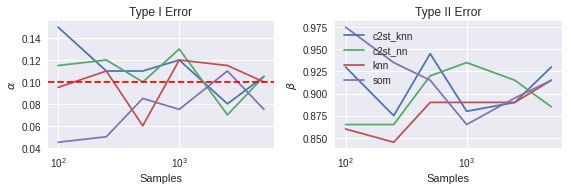

In [13]:
normal_fair_fig = plot_errors(n3_results, logscale=True)
normal_fair_fig.savefig(os.path.join(plot_dir, 'normal_fair_power_samples.eps'))

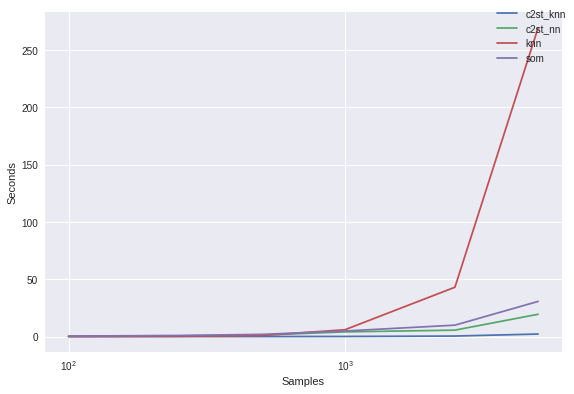

In [14]:
normal_fair_time = plot_time(n3_results, logscale=True)
normal_fair_time.savefig(os.path.join(plot_dir, 'normal_fair_time_samples.eps'))